In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
from rdkit import Chem

## SELECT CLASS 

In [2]:
df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/95molecule.csv')
df

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Document ChEMBL ID,Smiles,Smiles (RDKit Mol)
0,CHEMBL4290812,IC50,'=',0.3,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
1,CHEMBL4282688,IC50,'=',0.7,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2ncc(OC)c(-c3cn(C)c4ccccc34)...,
2,CHEMBL4279057,IC50,'=',0.7,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
3,CHEMBL4293126,IC50,'=',0.8,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
4,CHEMBL4277911,IC50,'=',0.8,nM,CHEMBL4257480,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,
...,...,...,...,...,...,...,...,...
90,CHEMBL4206604,Ki,'=',161.0,nM,CHEMBL4177539,CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3)c...,
91,CHEMBL4207425,Ki,'=',161.0,nM,CHEMBL4177539,C=CC(=O)N[C@@H]1CCN(c2nc(Nc3ccc(N4CCN(C)CC4)cc...,
92,CHEMBL4213741,Ki,'=',164.0,nM,CHEMBL4177539,C=CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3...,
93,CHEMBL4873830,IC50,'=',198.5,nM,CHEMBL4831496,O=C(O)c1ccccc1Nc1nc(Nc2ccc(OCC(=O)N3CCOCC3)cc2...,


In [3]:
sdf_file = "/home/federica/LAB2/chembl1865/egfr_qsar/db2_2.sdf"
suppl = Chem.SDMolSupplier(sdf_file)
data = []
for mol in suppl:
    if mol is not None:
        props = mol.GetPropsAsDict()
        props["Smiles"] = Chem.MolToSmiles(mol)
        data.append(props)
df = pd.DataFrame(data)
df

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Document ChEMBL ID,mutant,class,Smiles
0,CHEMBL4290812,IC50,'=',0.3,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
1,CHEMBL4282688,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2ncc(OC)c(-c3cn(C)c4ccccc34)...
2,CHEMBL4279057,IC50,'=',0.7,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
3,CHEMBL4293126,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
4,CHEMBL4277911,IC50,'=',0.8,nM,CHEMBL4257480,T790M/L858R,1,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...
...,...,...,...,...,...,...,...,...,...
90,CHEMBL4206604,Ki,'=',161.0,nM,CHEMBL4177539,T790M/L858R,4,CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3)c...
91,CHEMBL4207425,Ki,'=',161.0,nM,CHEMBL4177539,T790M/L858R,4,C=CC(=O)N[C@@H]1CCN(c2nc(Nc3ccc(N4CCN(C)CC4)cc...
92,CHEMBL4213741,Ki,'=',164.0,nM,CHEMBL4177539,T790M/L858R,4,C=CC(=O)N1CC[C@H](Nc2nc(Nc3ccc(N4CCN(C)CC4)cc3...
93,CHEMBL4873830,IC50,'=',198.5,nM,CHEMBL4831496,L858R/T790M,4,O=C(O)c1ccccc1Nc1nc(Nc2ccc(OCC(=O)N3CCOCC3)cc2...


In [4]:
df_class_1 = df.loc[(df['class'] == 1) | (df['class'] == 2) | (df['class'] == 3) | (df['class'] == 4)]
df_class_1['Smiles (RDKit Mol)'] = ' '
df_class_1.drop(columns=['mutant', 'class'], inplace=True)
df_class_1.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/class_4.csv', index=False)

/tmp/ipykernel_45841/3333517026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1['Smiles (RDKit Mol)'] = ' '
/tmp/ipykernel_45841/3333517026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1.drop(columns=['mutant', 'class'], inplace=True)


## DISTRIBUTION

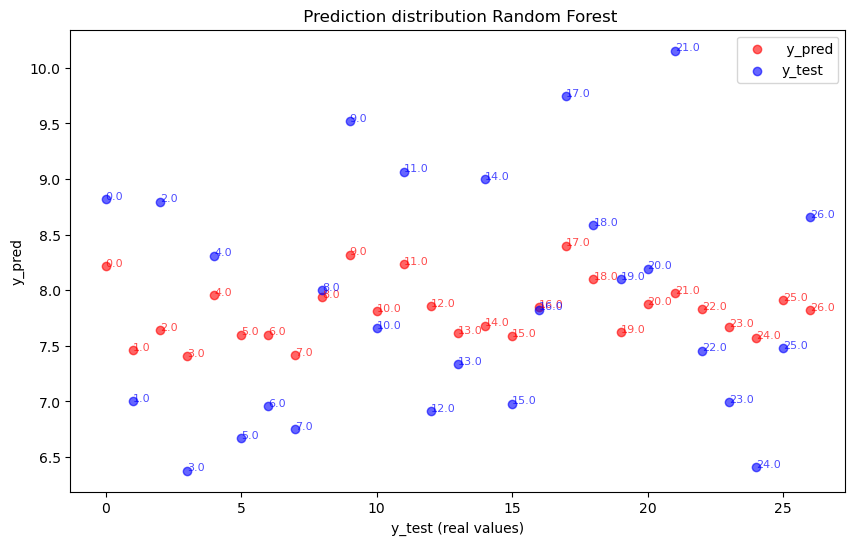

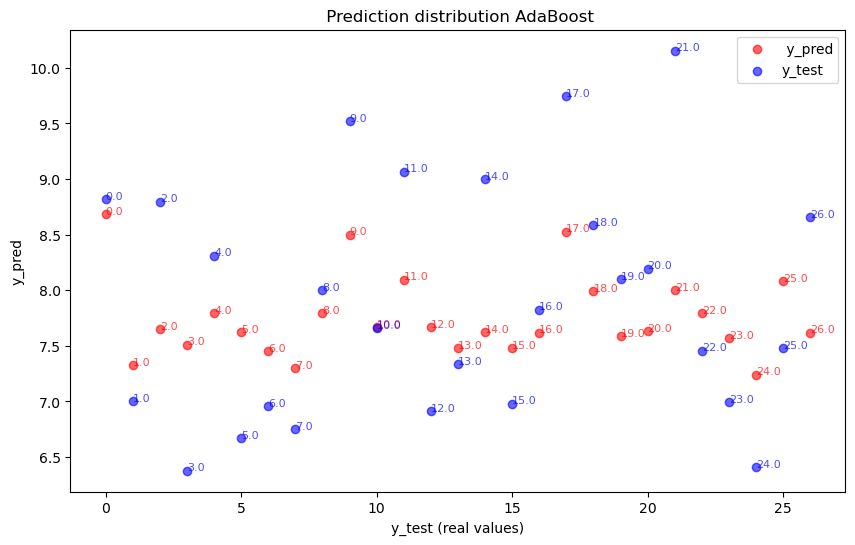

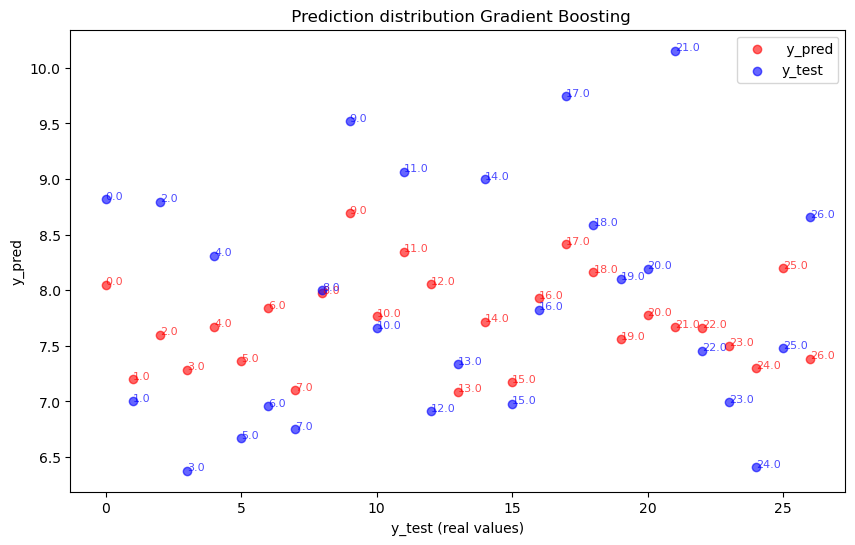

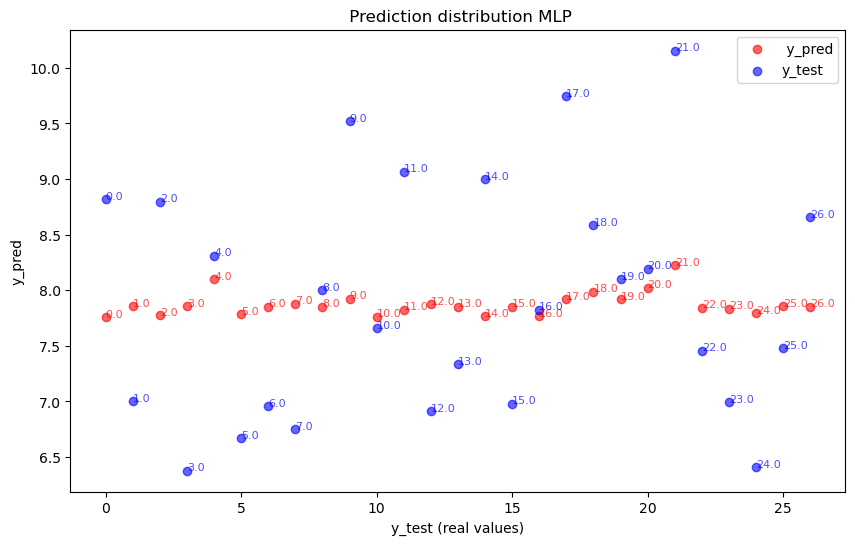

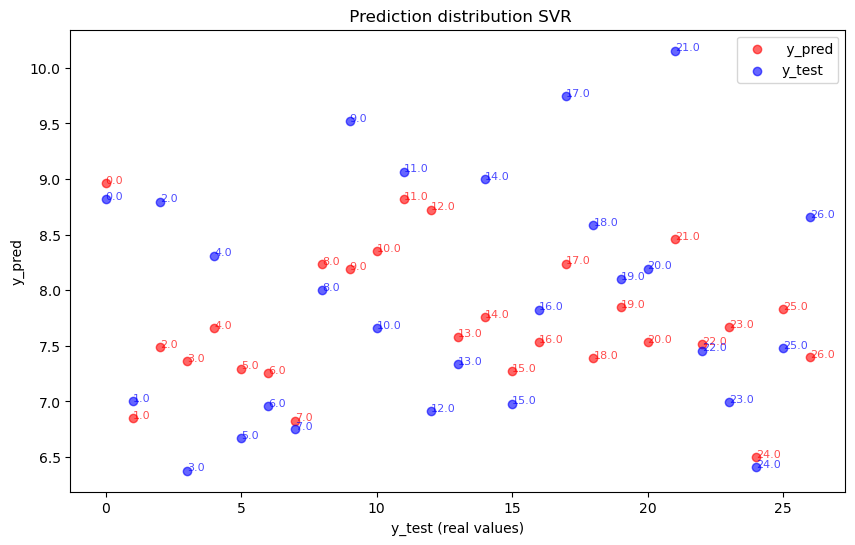

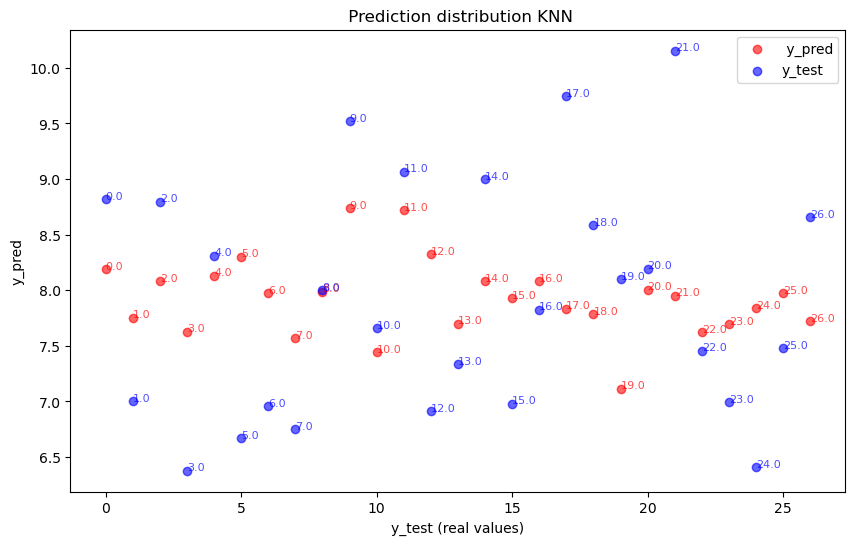

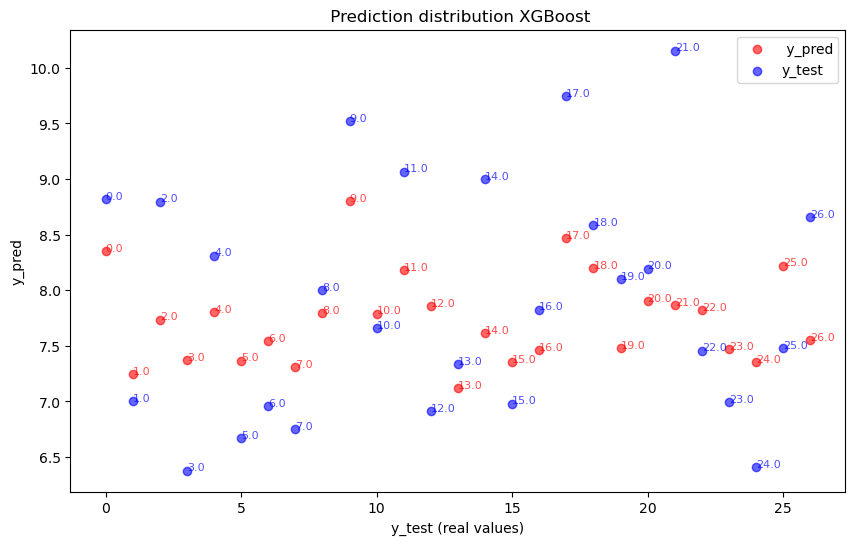

In [5]:
modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir = "/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/predictions"

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'ID' not in df.columns:
            df['ID'] = df.index

        plt.figure(figsize=(10, 6))
        plt.scatter(df["ID"], df["y_pred"], color="red", alpha=0.6, label=" y_pred")
        plt.scatter(df["ID"], df["y_test"], color="blue", alpha=0.6, label="y_test")


        for i,row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["ID"], row["y_pred"]), fontsize=8, alpha=0.7, color="red")
            plt.annotate(str(row["ID"]), (row["ID"], row["y_test"]), fontsize=8, alpha=0.7, color="blue")

        plt.xlabel("y_test (real values)")
        plt.ylabel("y_pred")
        plt.title(f" Prediction distribution {modello}")
        plt.legend()
        plt.savefig(f'/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/{modello}_point_distribution_test.png')

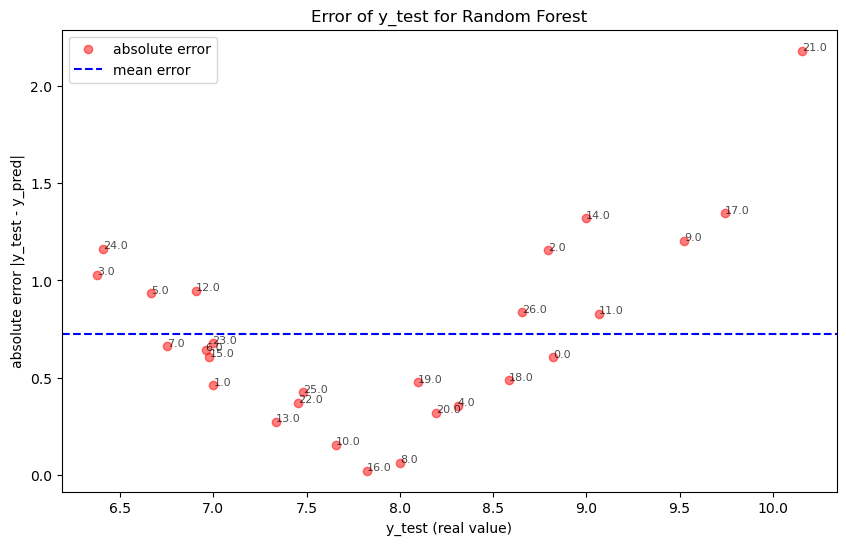

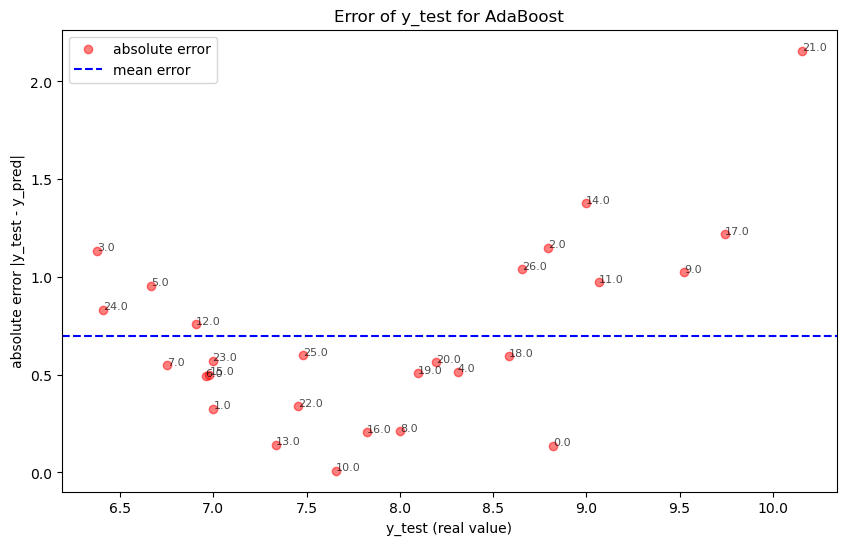

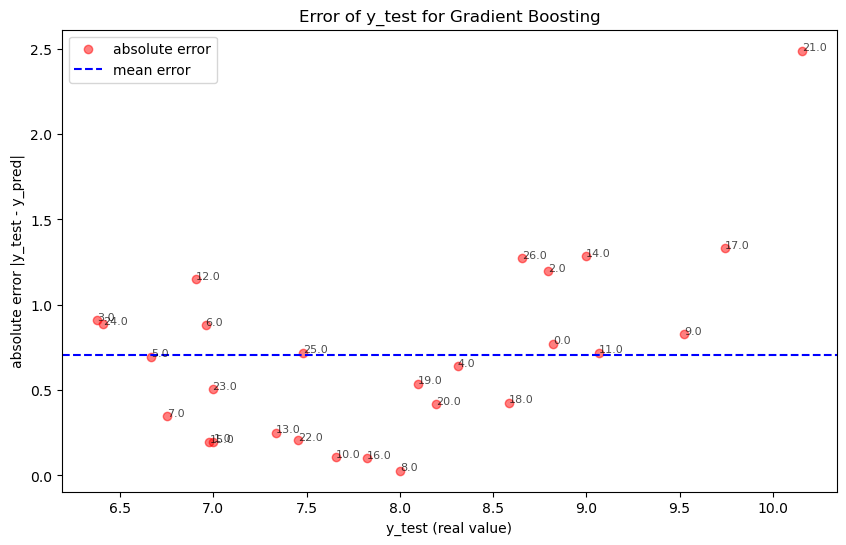

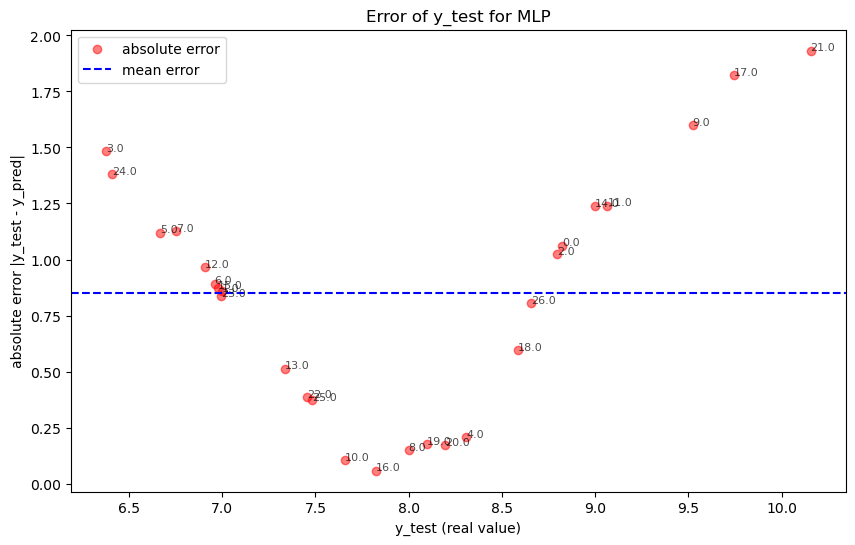

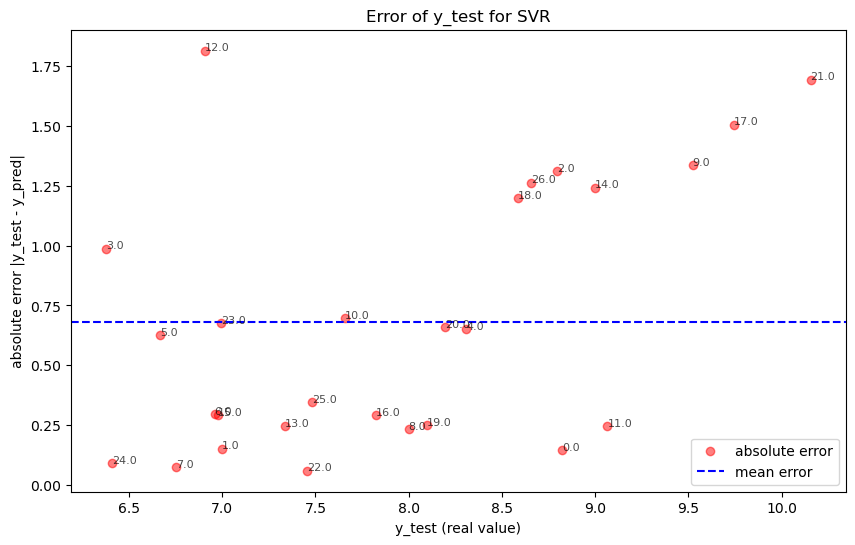

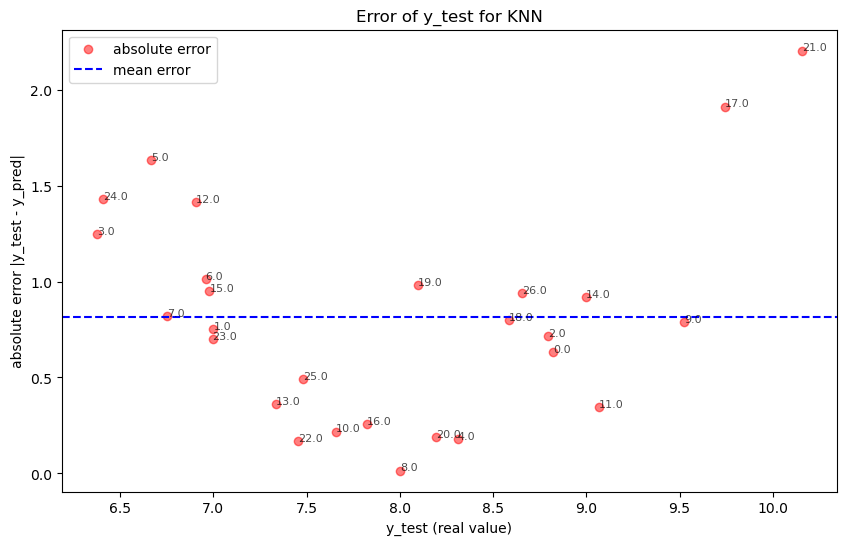

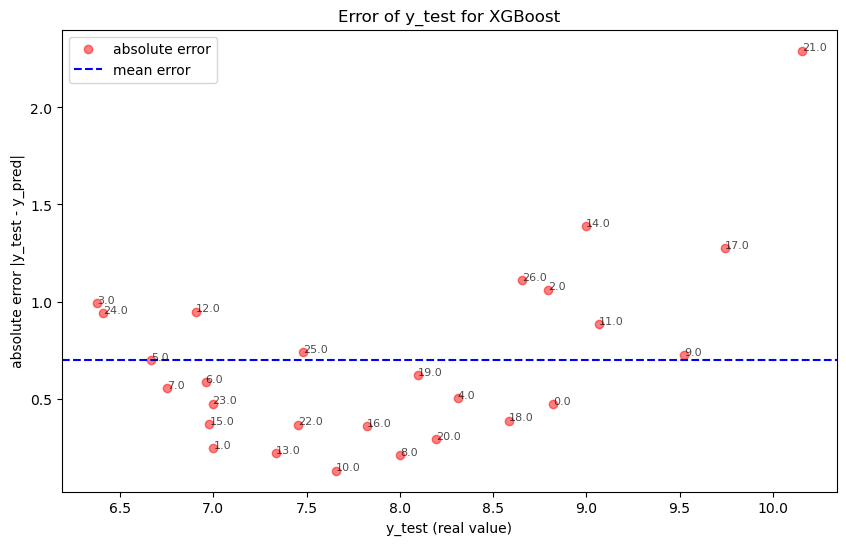

In [6]:
modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir = '/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/predictions/'

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if "ID" not in df.columns:
            df["ID"] = df.index  
        df["errore"] = np.abs(df["y_test"] - df["y_pred"])

        plt.figure(figsize=(10, 6))
        plt.scatter(df["y_test"], df["errore"], alpha=0.5, color="red", label="absolute error")
        plt.axhline(y=np.mean(df["errore"]), color="blue", linestyle="--", label="mean error")

        for i, row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["y_test"], row["errore"]), fontsize=8, alpha=0.7)

        plt.xlabel("y_test (real value)")
        plt.ylabel("absolute error |y_test - y_pred|")
        plt.title(f"Error of y_test for {modello}")
        plt.legend()
        plt.savefig(f"/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/{modello}_absolute_error_test.png")


## Tutte le molecole

Dimensioni X_train: (62, 2047)
Dimensioni X_test: (27, 2047)
  Molecule ChEMBL ID Standard Type Standard Relation  Standard Value  \
0      CHEMBL4792967          IC50               '='            0.17   
1      CHEMBL4460261          IC50               '='           65.00   
2      CHEMBL5175316          IC50               '='           87.00   
3      CHEMBL4098967          IC50               '='            1.90   
4      CHEMBL4790568          IC50               '='            1.01   

  Standard Units                                             Smiles  \
0             nM  C=CC(=O)Nc1cc(Nc2ncc(C(F)(F)F)c(-c3cn(C4COC4)c...   
1             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...   
2             nM  COc1ccc(C(=O)Nc2cc(Nc3nccc(-c4cn(C)c5ccccc45)n...   
3             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn4c5c(cccc35)CCC4)n2...   
4             nM  C#CCn1cc(-c2ccnc(Nc3cc(NC(=O)C=C)c(N(C)CCN(C)C...   

   rdkit_MaxAbsEStateIndex  rdkit_MaxEStateIndex  rdkit_MinAbsEStateIndex  \
0 

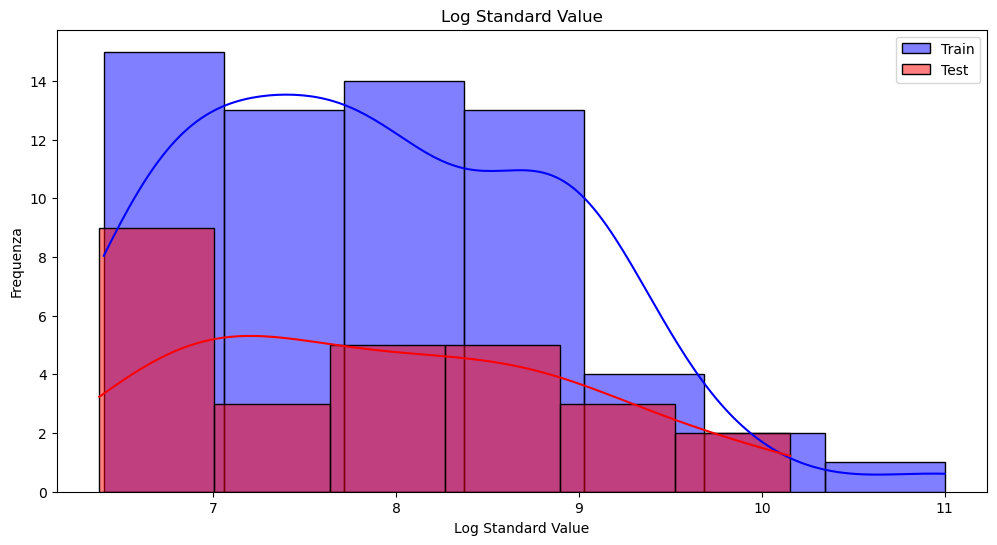

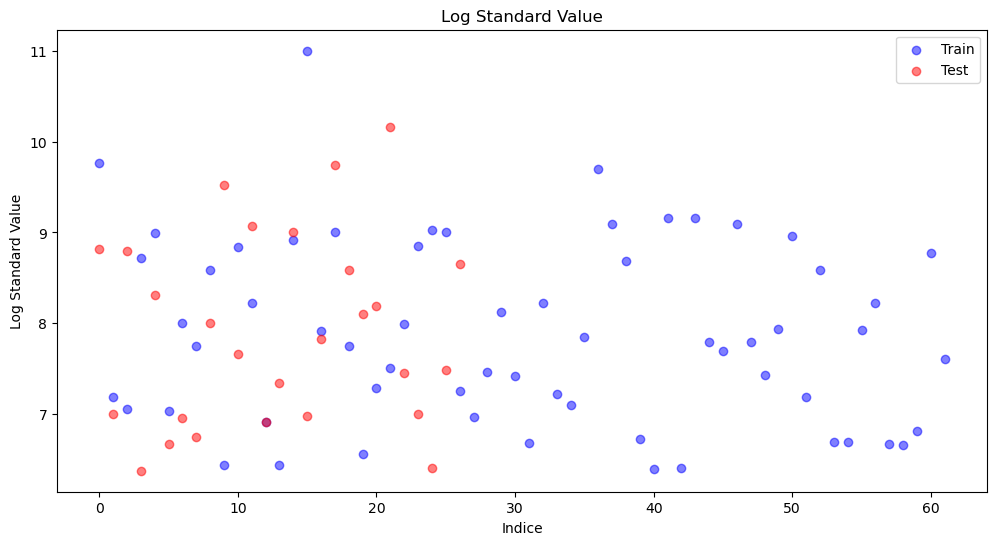

In [7]:
X_train = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/x.csv')
X_test = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/y.csv')
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")
print(X_train.head())
print(X_test.head())
print(X_train.describe())
print(X_test.describe())
plt.figure(figsize=(12, 6))
sns.histplot(X_train['Log Standard Value'], kde=True, color='blue', label='Train')
sns.histplot(X_test['Log Standard Value'], kde=True, color='red', label='Test')
plt.title('Log Standard Value')
plt.xlabel('Log Standard Value')
plt.ylabel('Frequenza')
plt.legend()
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/Input_histogram_log_standard_value.png')
plt.figure(figsize=(12, 6))
plt.scatter(range(len(X_train)), X_train['Log Standard Value'], color='blue', label='Train', alpha=0.5)
plt.scatter(range(len(X_test)), X_test['Log Standard Value'], color='red', label='Test', alpha=0.5)
plt.title('Log Standard Value')
plt.xlabel('Indice')
plt.ylabel('Log Standard Value')
plt.legend()
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/Input_scatter_log_standard_value.png')

## Risultati modelli 

In [8]:
df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/predictions/XGBoost_predictions_retrain_26.csv') 
y_test = df['y_test']
y_pred = df['y_pred']

In [9]:
def pic50_to_ic50(pic50_values):
    return (10 ** (-np.array(pic50_values))) * 1e9

y_test = pic50_to_ic50(y_test)
y_pred = pic50_to_ic50(y_pred)

df_values = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})


In [ ]:
y = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/y.csv')
df_values["Molecule ChEMBL ID"] = y["Molecule ChEMBL ID"]

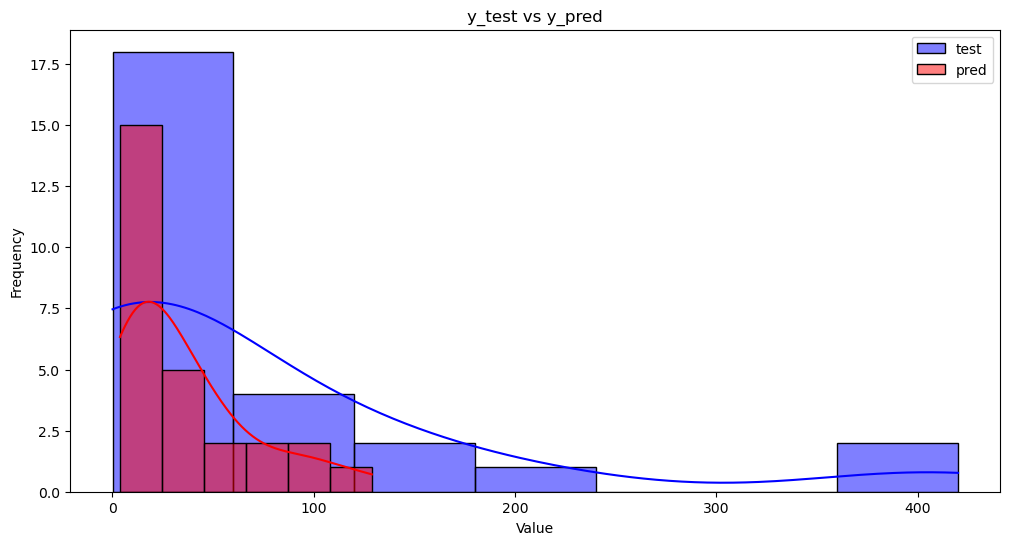

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, kde=True, color='blue', label='test')
sns.histplot(y_pred, kde=True, color='red', label='pred')
plt.title('y_test vs y_pred')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/y_test_vs_y_pred.png')

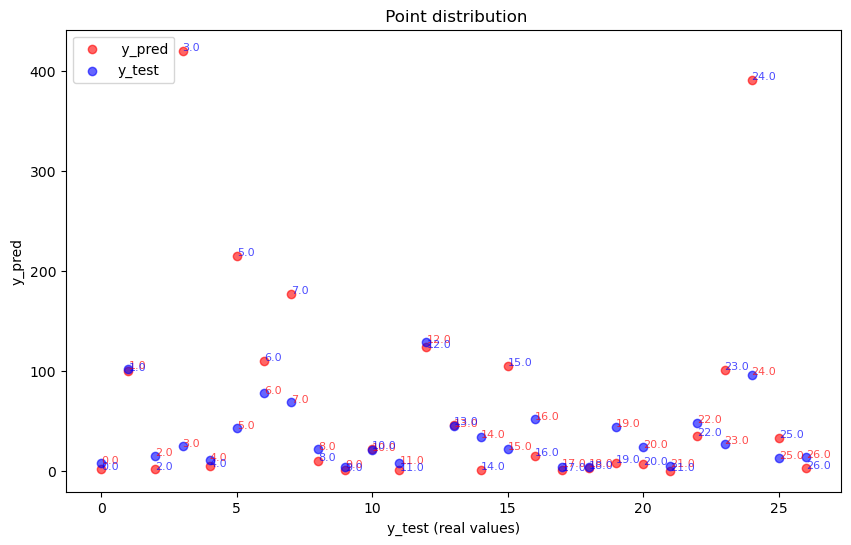

In [13]:
df['y_test'] = pic50_to_ic50(df['y_test'])
df['y_pred'] = pic50_to_ic50(df['y_pred'])
if 'ID' not in df.columns:
    df['ID'] = df.index

plt.figure(figsize=(10, 6))
plt.scatter(df["ID"], df["y_test"], color="red", alpha=0.6, label=" y_pred")
plt.scatter(df["ID"], df["y_pred"], color="blue", alpha=0.6, label="y_test")


for i,row in df.iterrows():
    plt.annotate(str(row["ID"]), (row["ID"], row["y_pred"]), fontsize=8, alpha=0.7, color="red")
    plt.annotate(str(row["ID"]), (row["ID"], row["y_test"]), fontsize=8, alpha=0.7, color="blue")

plt.xlabel("y_test (real values)")
plt.ylabel("y_pred")
plt.title(f" Point distribution")
plt.legend()
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/scatter_point_distribution.png')

In [ ]:
df_values["abs_error"] = np.abs(df_values["y_test"] - df_values["y_pred"])
df_values.columns
df_values.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/y_values.csv')

## Selected Features

In [14]:
y_df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/y.csv')
selected_features = np.load('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/selected_features.npy')
molecule_ids = ['CHEMBL4103912', 'CHEMBL4761468', 'CHEMBL4290812', 'CHEMBL4745195', 'CHEMBL3353410', 'CHEMBL4548960', 'CHEMBL3633141', 'CHEMBL4441933', 'CHEMBL4464879', 'CHEMBL4447982',
'CHEMBL4468034', 'CHEMBL4566583', 'CHEMBL5174232', 'CHEMBL5185772'] 

In [ ]:
df_selected_molecules = y_df[y_df["Molecule ChEMBL ID"].isin(molecule_ids)]
df_selected_features = df_selected_molecules[list(selected_features)]
summary_statistics = df_selected_features.describe().T 
summary_statistics["mean_all"] = y_df[list(selected_features)].mean()
summary_statistics["std_all"] = y_df[list(selected_features)].std()
summary_statistics.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/summary_statistics.csv')
print(summary_statistics)

                         count       mean       std        min        25%  \
rdkit_MaxAbsEStateIndex   14.0  13.851186  0.565638  13.293433  13.507775   
rdkit_MinAbsEStateIndex   14.0   0.128078  0.056182   0.026518   0.109949   
rdkit_MinEStateIndex      14.0  -4.684525  0.224975  -4.969697  -4.800379   
rdkit_qed                 14.0   0.267508  0.034321   0.207742   0.240718   
rdkit_SPS                 14.0  26.908438  2.471429  24.000000  25.327620   
...                        ...        ...       ...        ...        ...   
mordred_JGI8              14.0   0.010925  0.000872   0.008964   0.010436   
mordred_JGI9              14.0   0.007224  0.000399   0.006740   0.006894   
mordred_JGI10             14.0   0.007427  0.000357   0.006725   0.007217   
mordred_Diameter          14.0  17.071429  0.474631  16.000000  17.000000   
mordred_TopoShapeIndex    14.0   0.912698  0.047313   0.888889   0.888889   

                               50%        75%        max   mean_all   std_a

In [16]:
xgb_df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/y_values.csv')
xgb_df["prediction_error"] = abs(xgb_df["y_pred"] - xgb_df["y_test"])
y_df = y_df.merge(xgb_df[["Molecule ChEMBL ID", "prediction_error"]], on="Molecule ChEMBL ID")
correlations = y_df[list(selected_features)].corrwith(xgb_df["prediction_error"]).sort_values(ascending=False)
correlations.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/correlations_error.csv')

/home/federica/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/federica/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/tmp/ipykernel_45841/4200754953.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')


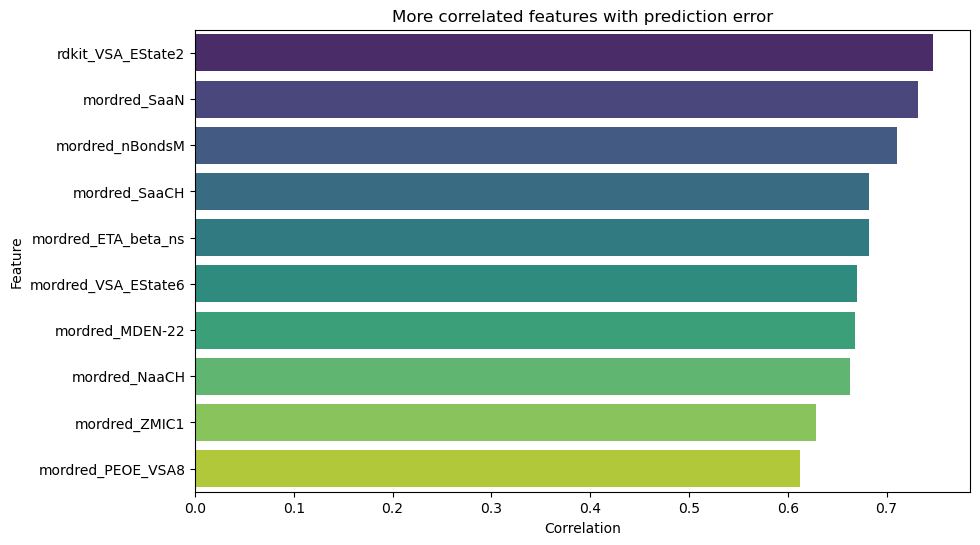

In [17]:
correlation_data = {
    'Feature': ['rdkit_VSA_EState2', 'mordred_SaaN', 'mordred_nBondsM', 'mordred_SaaCH', 'mordred_ETA_beta_ns', 
                'mordred_VSA_EState6', 'mordred_MDEN-22', 'mordred_NaaCH', 'mordred_ZMIC1', 'mordred_PEOE_VSA8'],
    'Correlation': [0.747164, 0.732023, 0.710881, 0.682753, 0.682454, 0.670146, 0.668460, 0.663132, 0.628807, 0.612620]
}

correlation_df = pd.DataFrame(correlation_data)
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')
plt.title('More correlated features with prediction error')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/correlation_error_features.png')
plt.show()

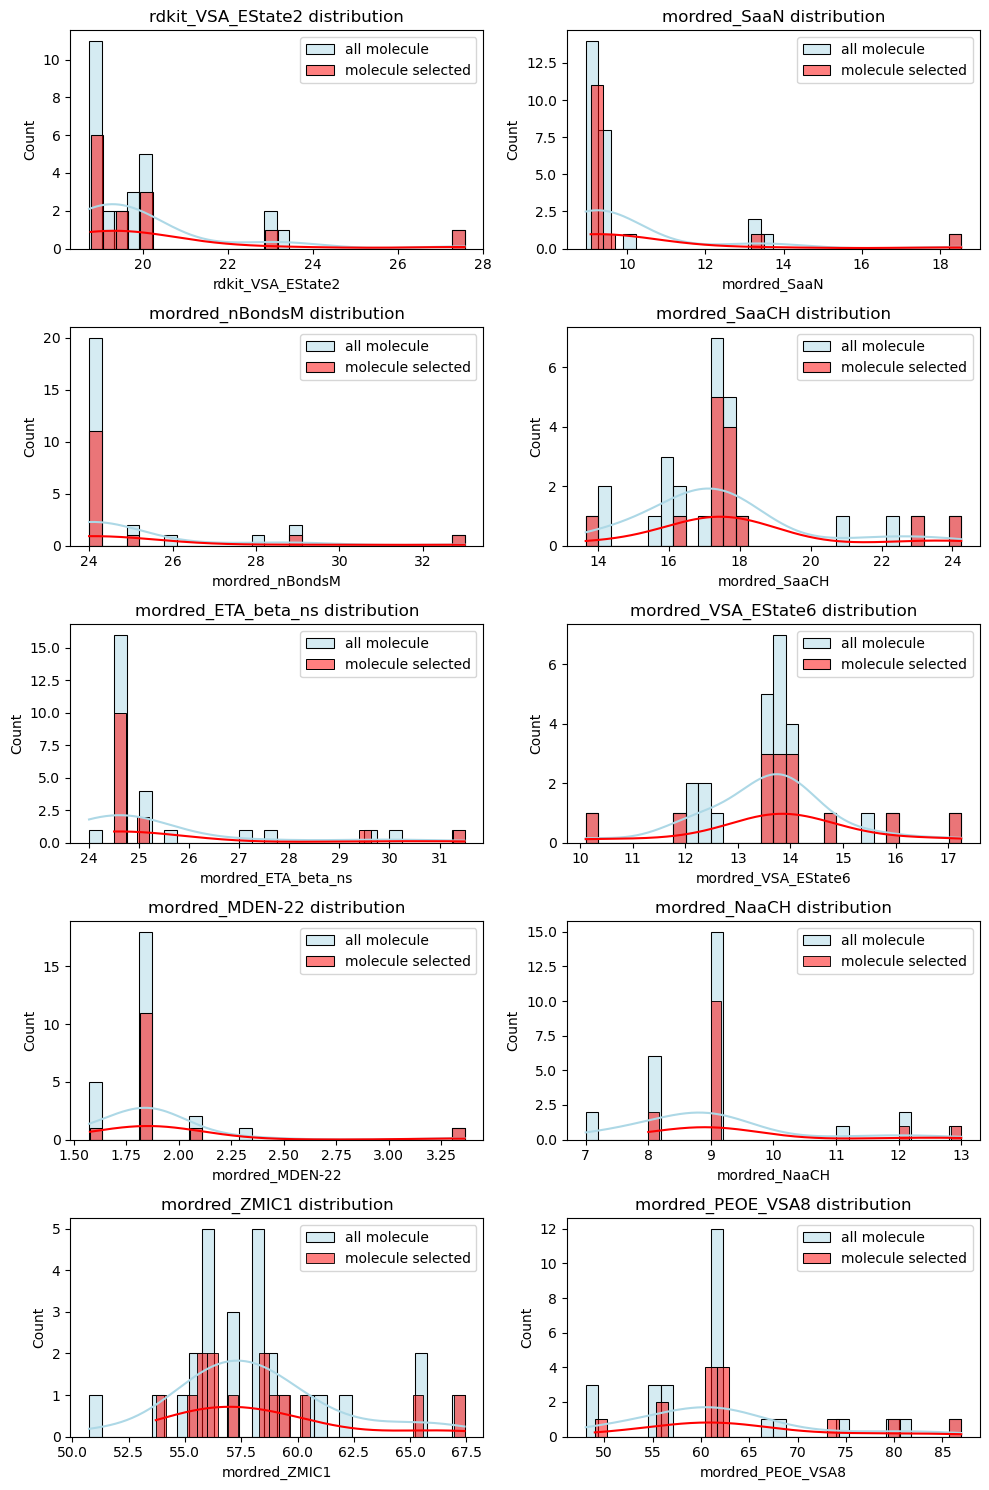

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
axes = axes.flatten()
for i, feature in enumerate(correlation_data["Feature"]):
    sns.histplot(y_df[feature], bins=30, kde=True, color="lightblue", label="all molecule", ax=axes[i])
    sns.histplot(df_selected_features[feature], bins=30, kde=True, color="red", label="molecule selected", ax=axes[i])
    axes[i].set_title(f"{feature} distribution")
    axes[i].legend()

plt.tight_layout()
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/feature_distribution_error_scelected.png')

In [23]:
df_selected_molecules

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,Smiles,rdkit_MaxAbsEStateIndex,rdkit_MaxEStateIndex,rdkit_MinAbsEStateIndex,rdkit_MinEStateIndex,...,mordred_TSRW10,mordred_MW,mordred_AMW,mordred_WPath,mordred_WPol,mordred_Zagreb1,mordred_Zagreb2,mordred_mZagreb1,mordred_mZagreb2,Log Standard Value
3,CHEMBL5185772,IC50,'=',420.00,nM,COc1cc(N(C)CCN(C)C)c(NC(=O)c2nccn2C)cc1Nc1nc(-...,14.526881,14.526881,0.123553,-4.862099,...,99.003470,604.302270,7.460522,7277,77,244.0,293.0,14.138889,9.805556,6.376751
5,CHEMBL4566583,IC50,'=',215.00,nM,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,13.401096,13.401096,0.169350,-4.285233,...,86.835340,502.215095,7.609320,4212,59,186.0,220.0,11.833333,8.194444,6.667562
7,CHEMBL4468034,IC50,'=',177.00,nM,CC/C=C\C(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2...,14.049407,14.049407,0.105414,-4.875431,...,90.127248,527.300873,6.938169,5291,62,200.0,234.0,13.194444,8.777778,6.752027
9,CHEMBL4290812,IC50,'=',0.30,nM,C=C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c...,13.619376,13.619376,0.161534,-4.369949,...,89.288095,509.253923,7.380492,4833,63,202.0,240.0,11.444444,8.444444,9.522879
11,CHEMBL4745195,IC50,'=',0.86,nM,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(CCO)c4ccccc34)n2)c...,13.559009,13.559009,0.031686,-4.788147,...,90.169848,529.280138,7.152434,5283,63,200.0,235.0,13.194444,8.861111,9.065502
14,CHEMBL3353410,IC50,'=',1.00,nM,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,13.506125,13.506125,0.140397,-4.753752,...,87.974766,499.269573,7.132422,4557,60,192.0,226.0,12.694444,8.277778,9.000000
15,CHEMBL4447982,IC50,'=',105.00,nM,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,13.408640,13.408640,0.152535,-4.576707,...,87.974766,518.210010,7.734478,4557,60,192.0,226.0,12.694444,8.277778,6.978811
16,CHEMBL3633141,IC50,'=',15.00,nM,C=CC(=O)Nc1cc(Nc2cncc(-c3cn(C)c4ccccc34)n2)c(O...,13.512724,13.512724,0.144920,-4.757132,...,87.974766,499.269573,7.132422,4557,60,192.0,226.0,12.694444,8.277778,7.823909
17,CHEMBL4761468,IC50,'=',0.18,nM,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C4CC4)c4ccccc34)n2...,13.570708,13.570708,0.223730,-4.779012,...,95.807751,525.285223,7.098449,5246,64,208.0,248.0,12.305556,8.638889,9.744727
19,CHEMBL4548960,IC50,'=',8.00,nM,CCC/C=C\C(=O)Nc1cc(Nc2nc(C)cc(-c3cn(C)c4ccccc3...,14.292346,14.292346,0.026518,-4.969697,...,92.366338,555.332174,6.772344,6015,65,210.0,245.0,14.305556,9.194444,8.096910


In [29]:
df_selected_features_only = y_df[selected_features]
df_selected_features_only["Molecule ChEMBL ID"] = y_df["Molecule ChEMBL ID"]
df_selected_features_only.to_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/selected_features_only.csv')

/tmp/ipykernel_45841/4184690417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_only["Molecule ChEMBL ID"] = y_df["Molecule ChEMBL ID"]


## Clustering 

In [30]:
from sklearn.cluster import KMeans
features_df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/selected_features_only.csv')
y_values_df = pd.read_csv('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/y_values.csv')

In [34]:
merged_df = pd.merge(features_df, y_values_df, on='Molecule ChEMBL ID')
merged_df_no_id = merged_df.drop(columns=['Molecule ChEMBL ID'])
correlation_matrix = merged_df_no_id.corr()
abs_error_corr = correlation_matrix['abs_error'].drop('abs_error')
high_corr_features = abs_error_corr[abs_error_corr.abs() > 0.5].index.tolist()
filtered_df = merged_df[high_corr_features]

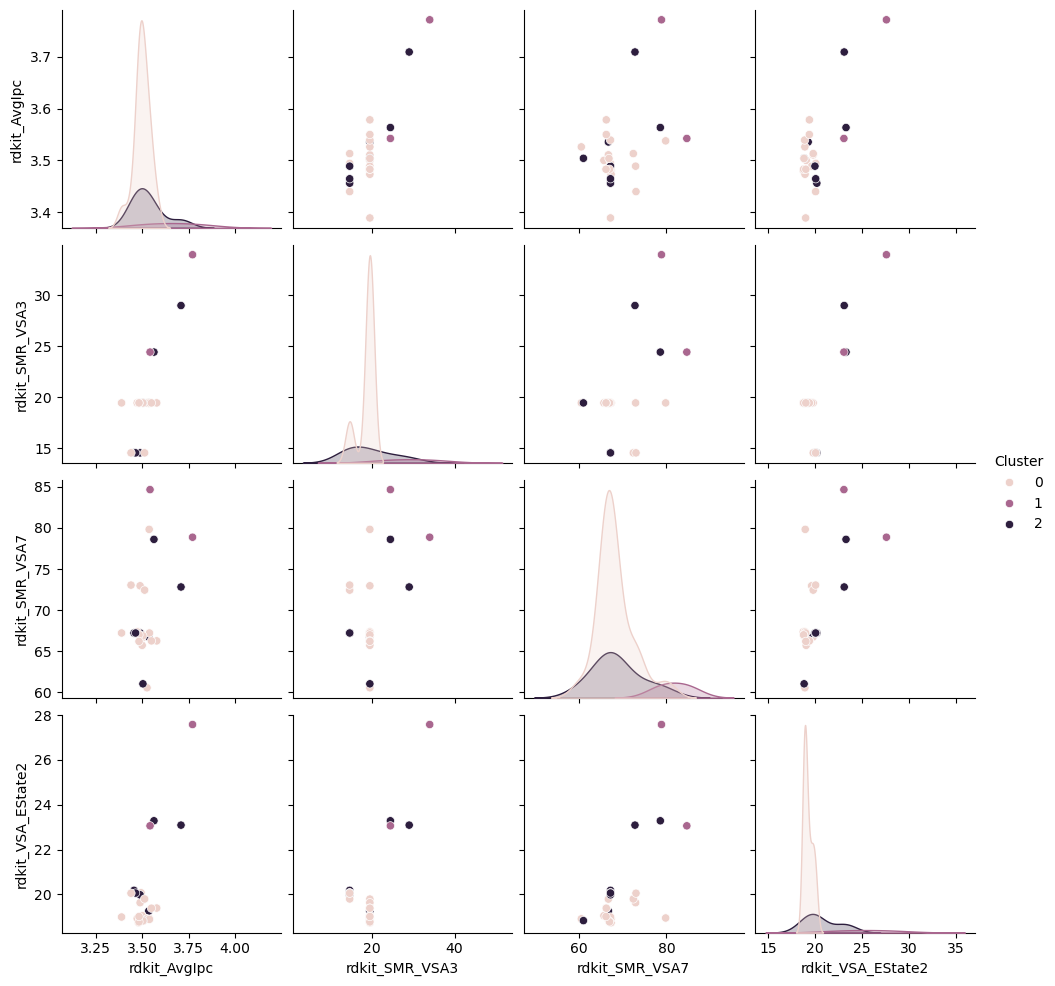

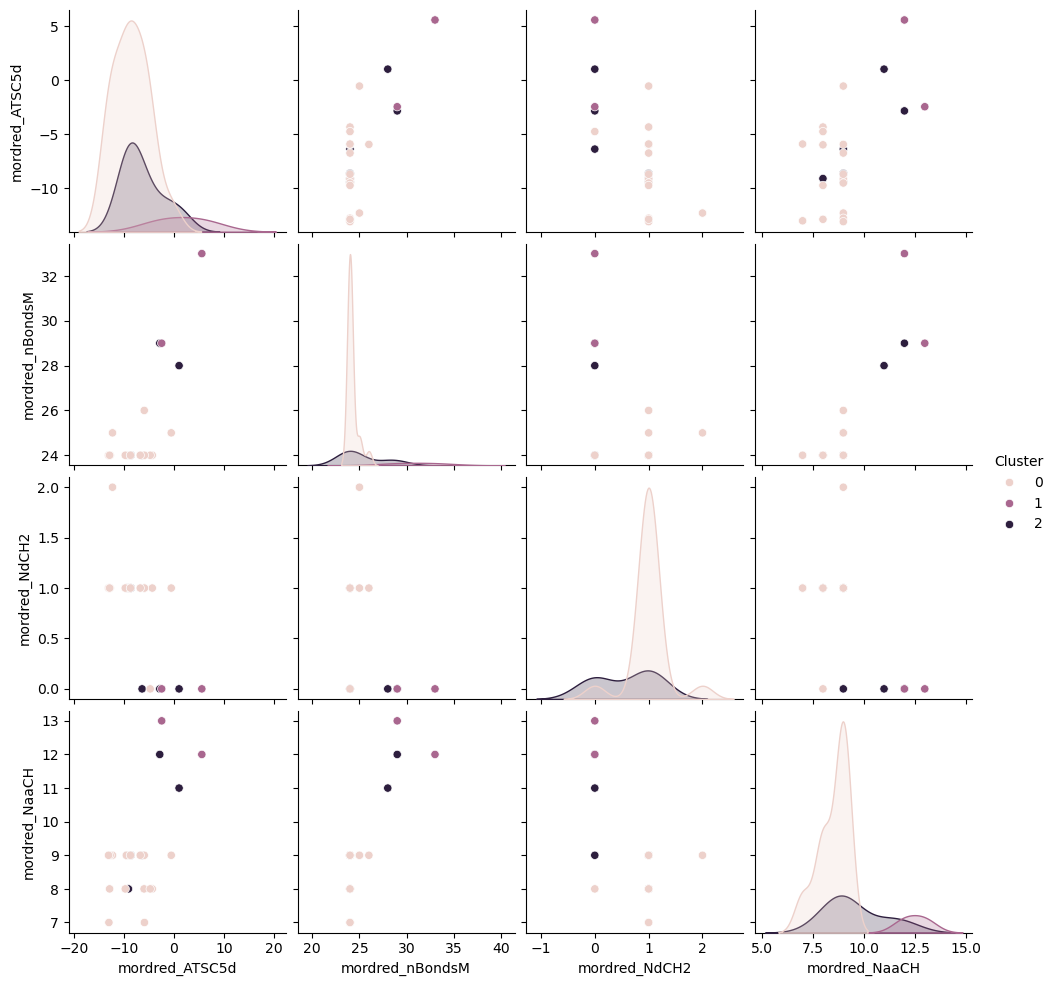

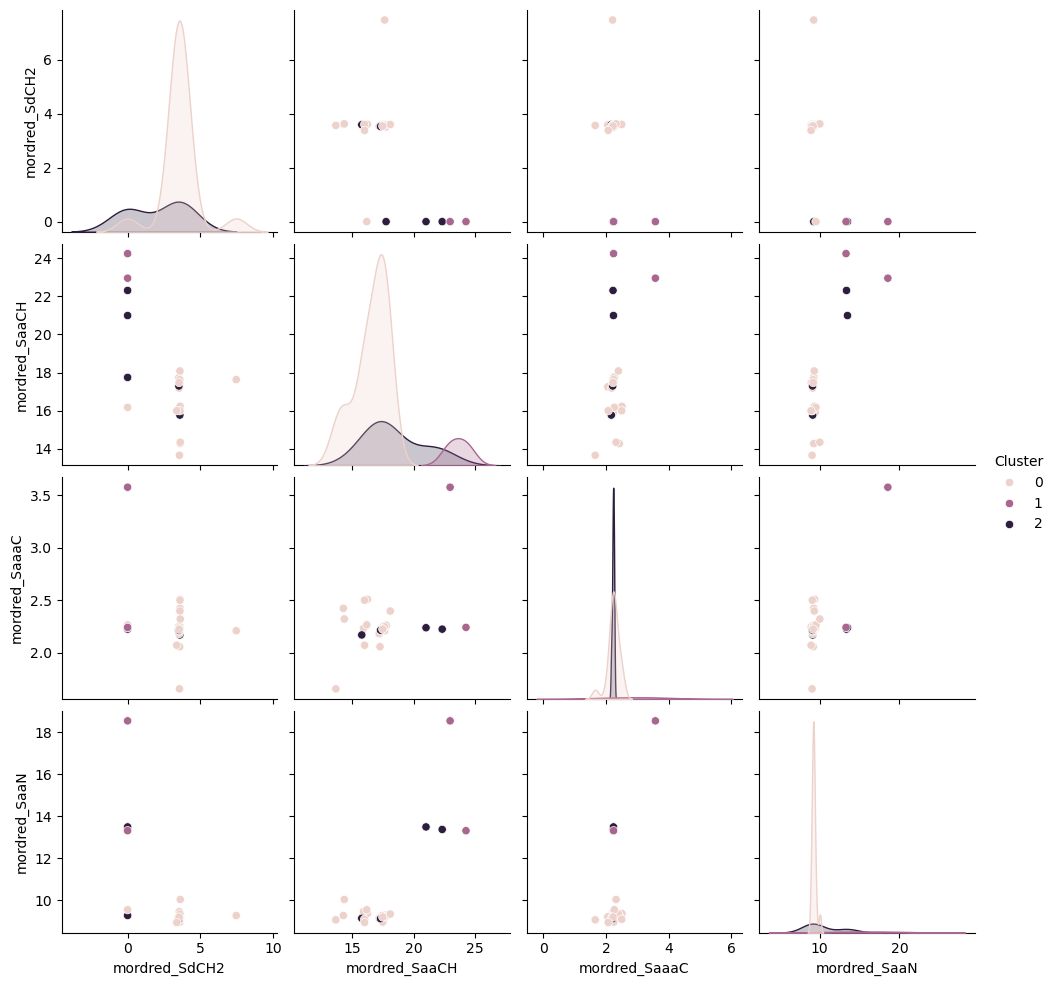

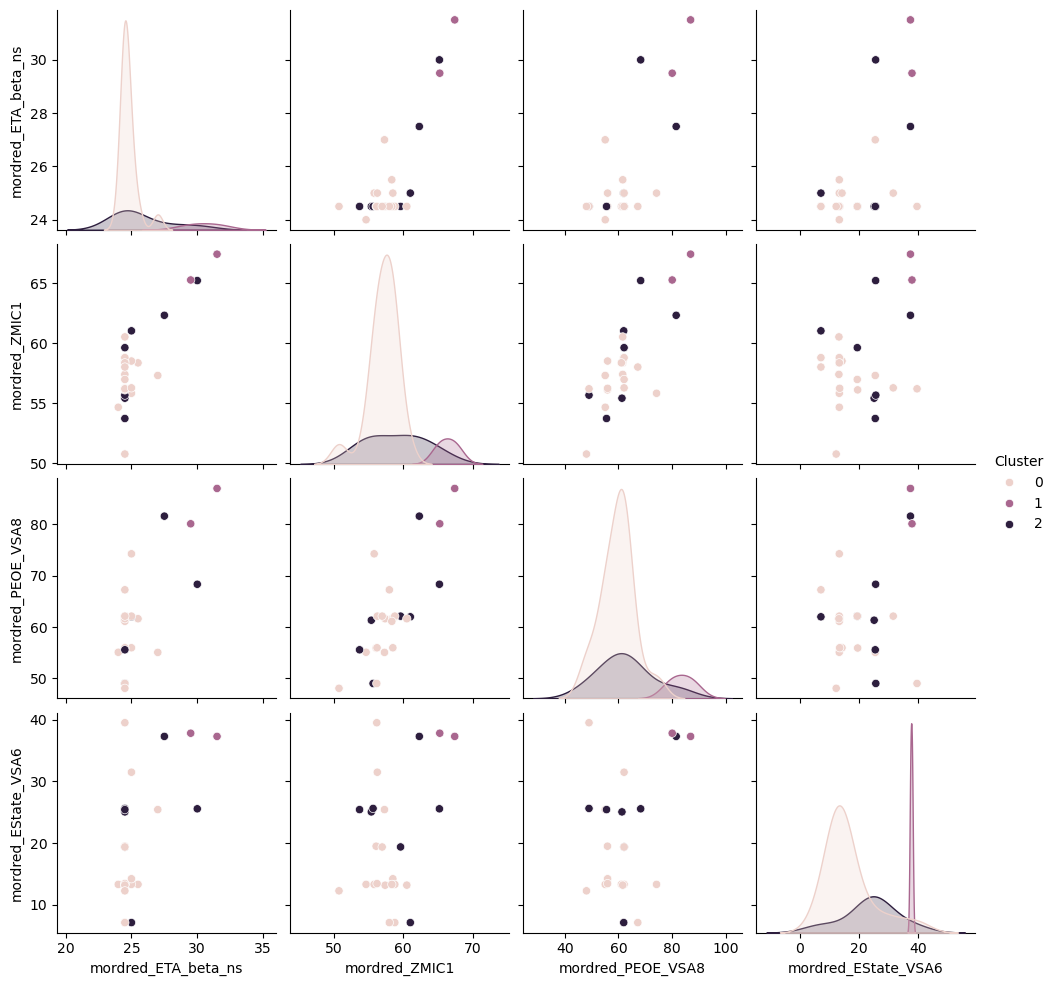

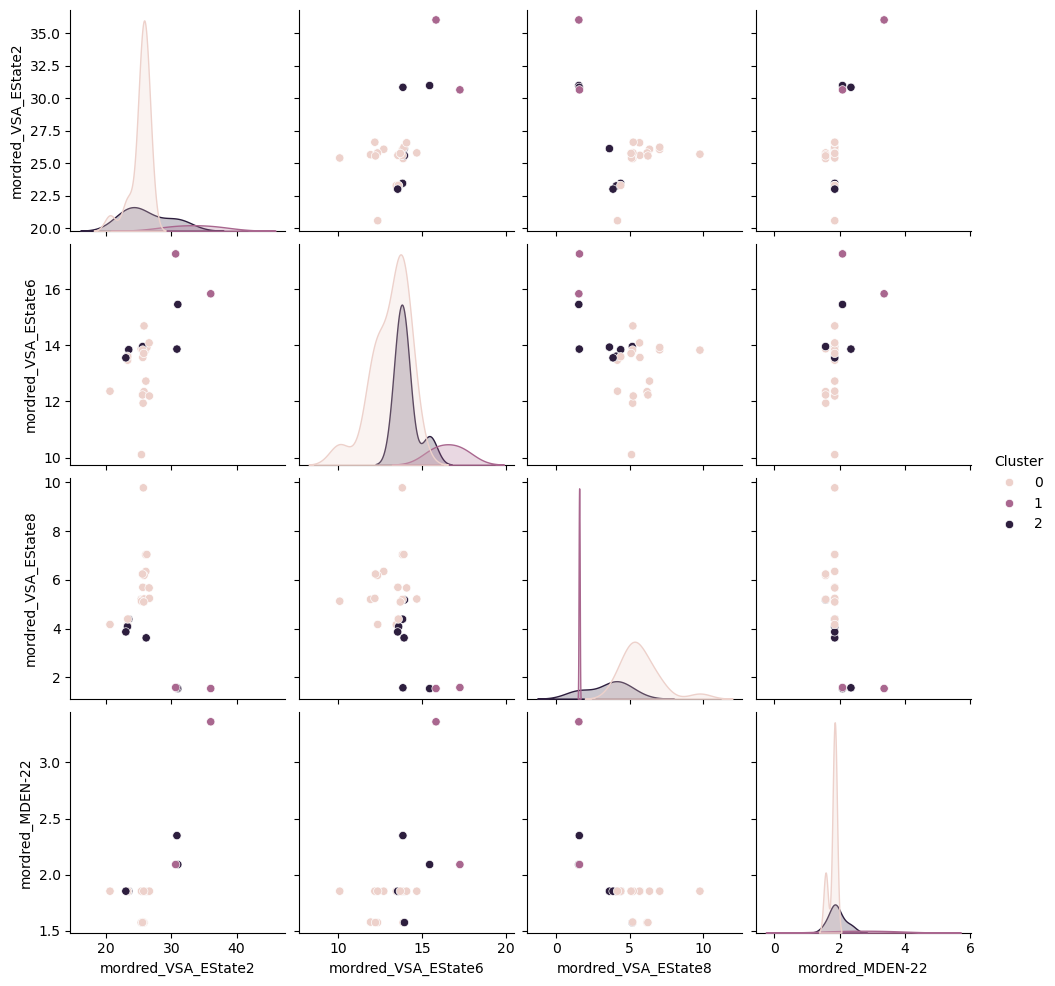

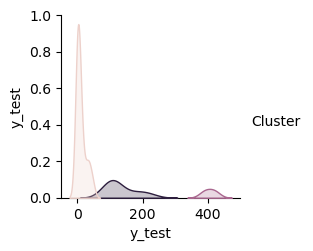

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(filtered_df)
merged_df['Cluster'] = clusters
num_features_per_plot = 4
for i in range(0, len(high_corr_features), num_features_per_plot):
    subset_features = high_corr_features[i:i + num_features_per_plot]
    sns.pairplot(merged_df, hue='Cluster', vars=subset_features)
    plt.savefig(f'/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/cluster_{i}_pairplot.png')

In [39]:
error_stats = merged_df.groupby('Cluster')['abs_error'].describe()

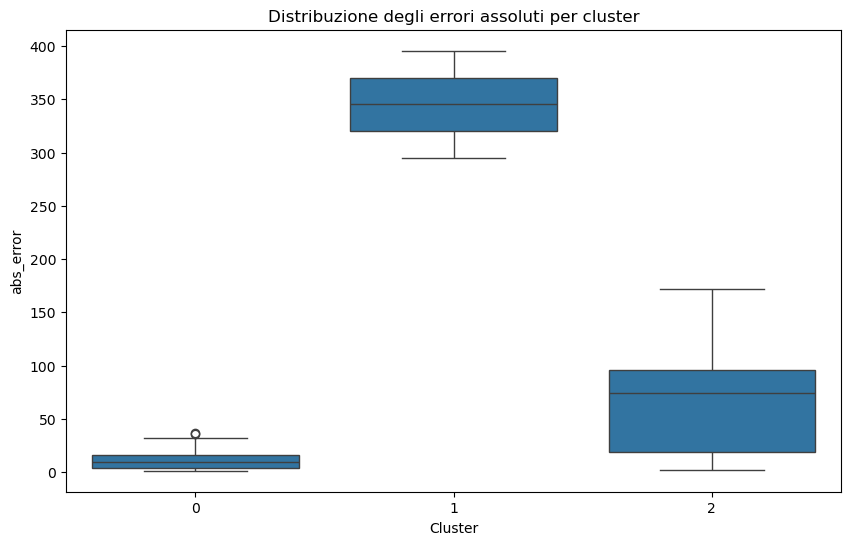

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='abs_error', data=merged_df)
plt.title('Distribuzione degli errori assoluti per cluster')
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/error_distribution_boxplot.png')
plt.show()

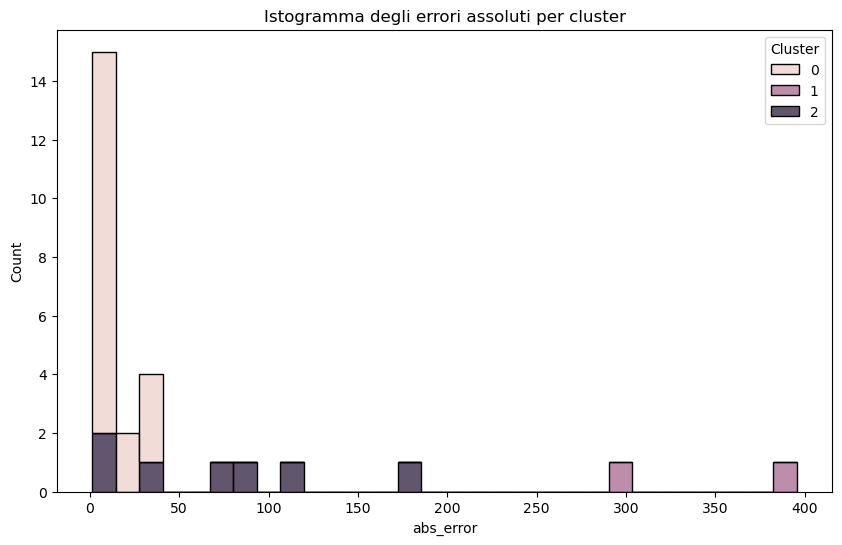

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='abs_error', hue='Cluster', multiple='stack', bins=30)
plt.title('Istogramma degli errori assoluti per cluster')
plt.savefig('/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/error_distribution_histogram.png')
plt.show()

## Zoom molecole


In [42]:
high_error_threshold = merged_df['abs_error'].quantile(0.9)
high_error_molecules = merged_df[merged_df['abs_error'] > high_error_threshold]

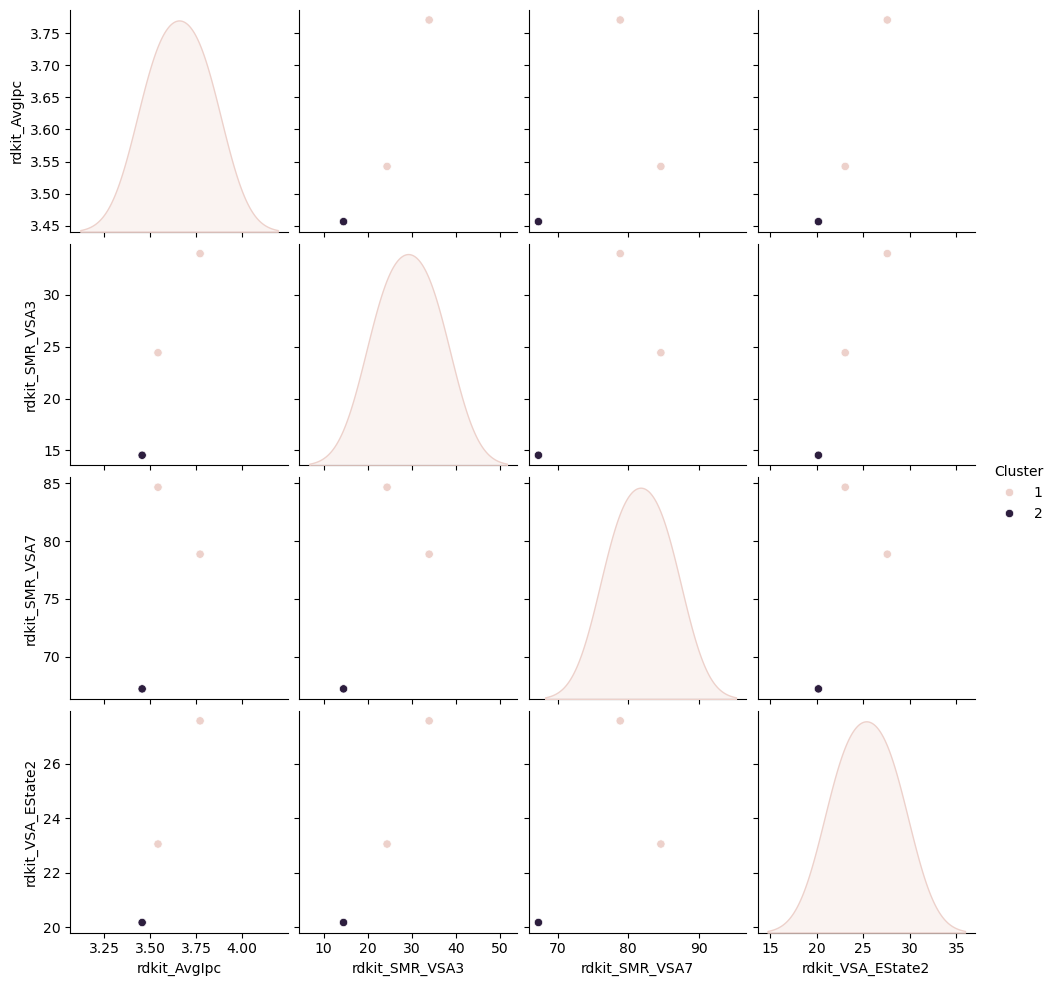

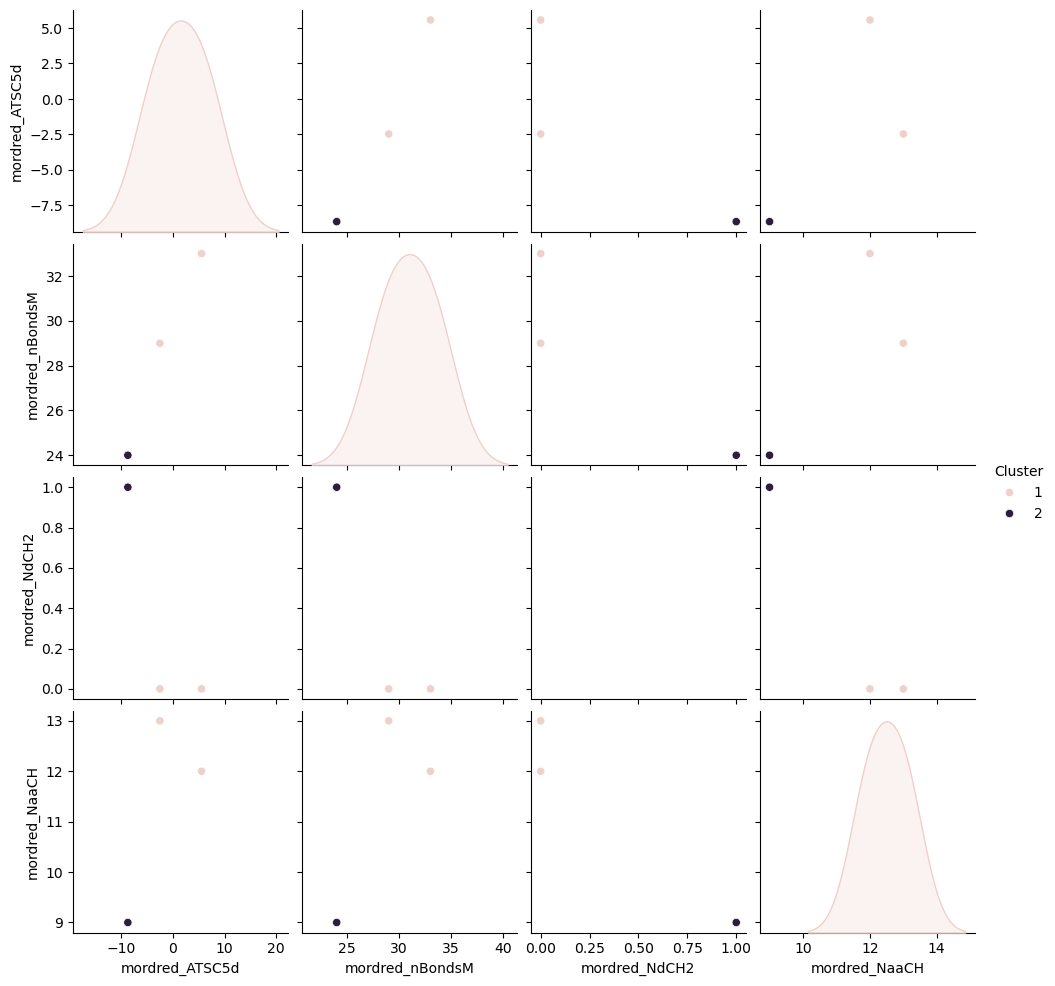

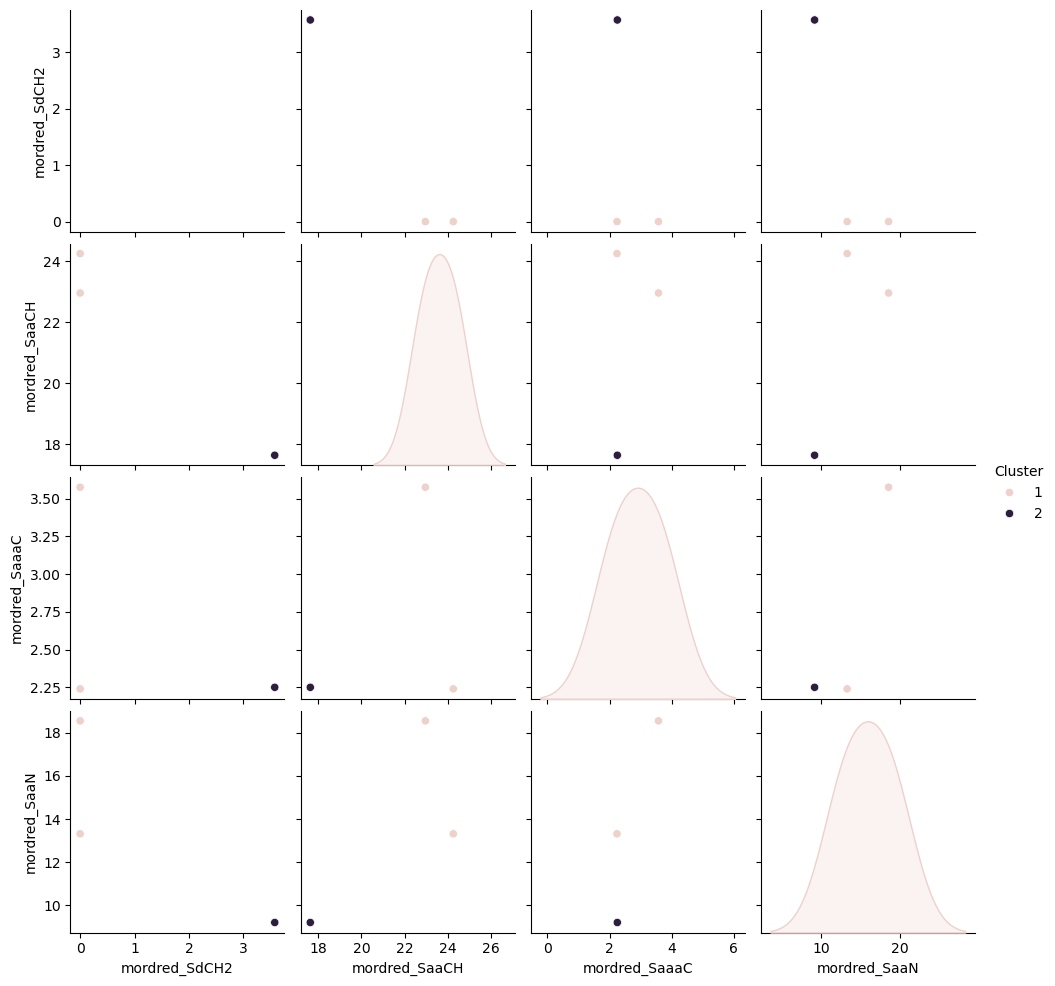

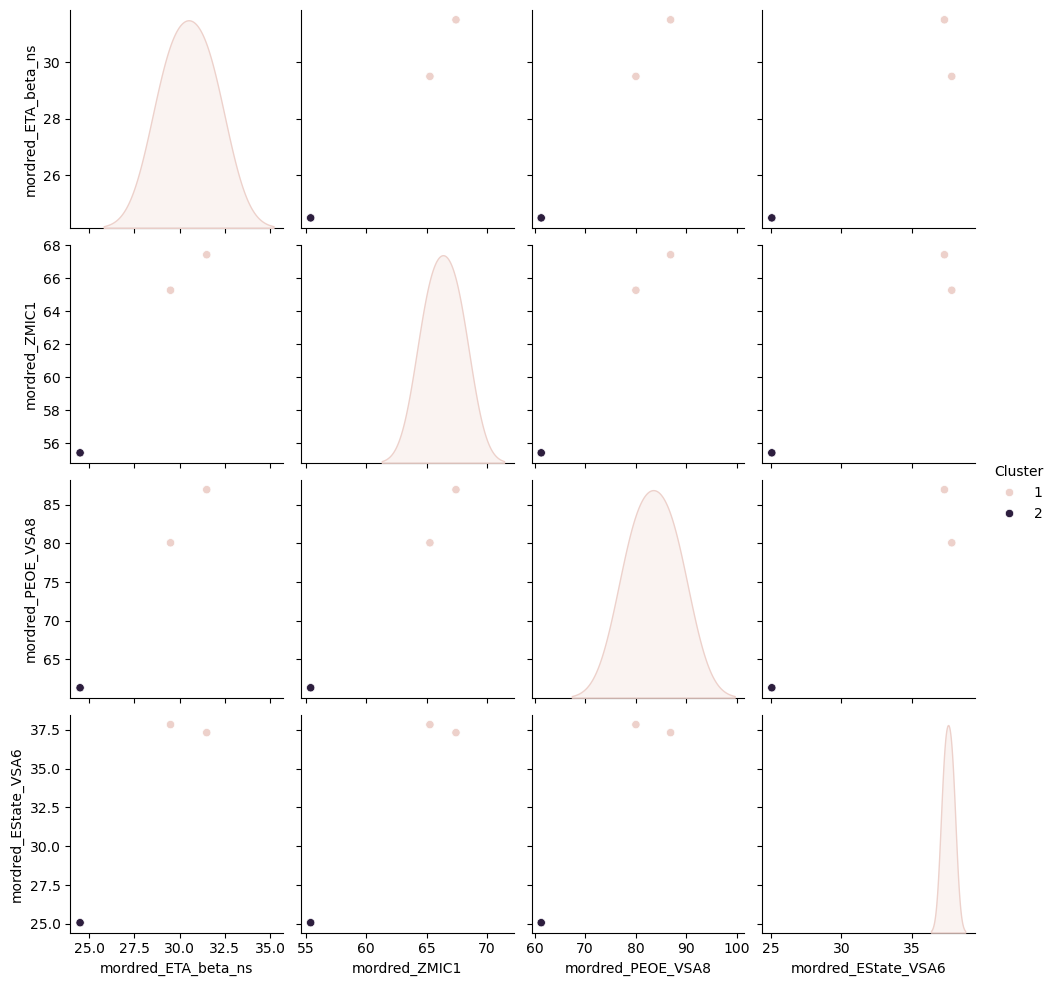

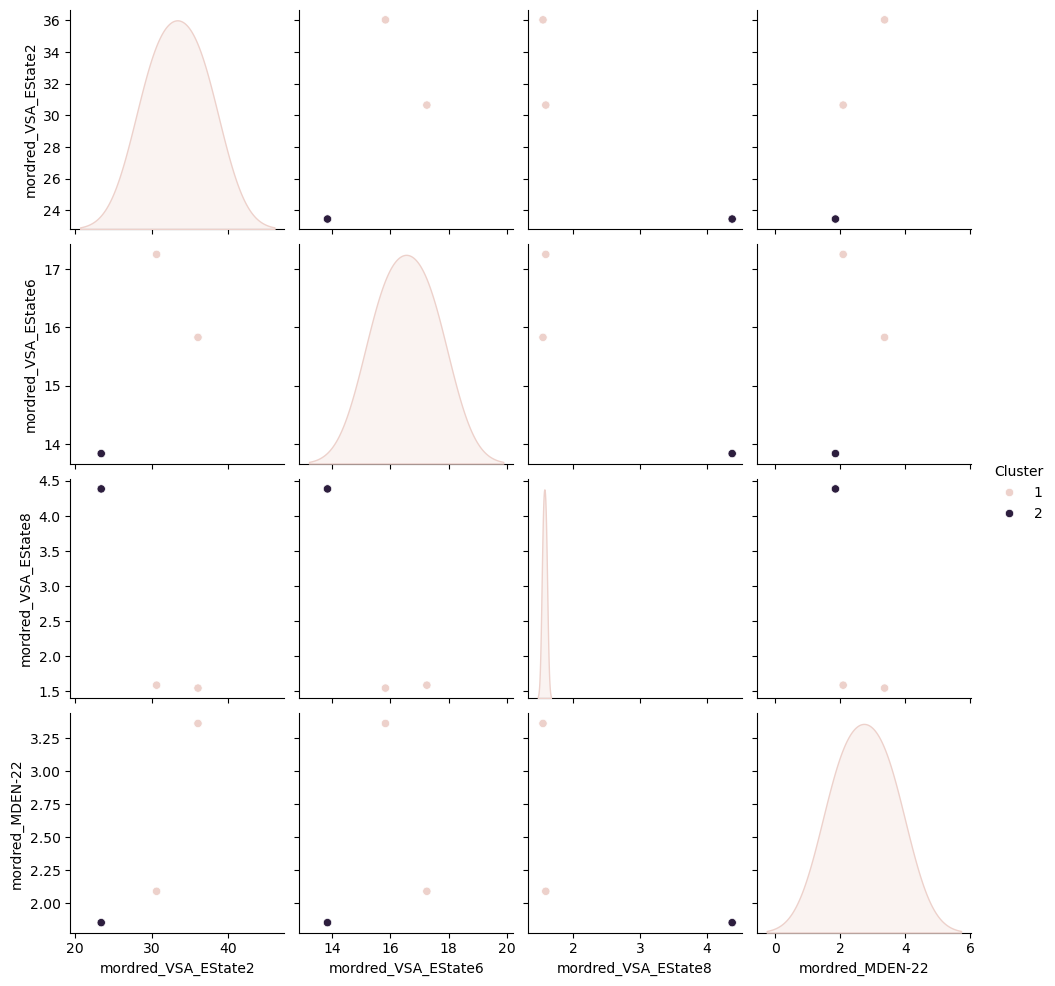

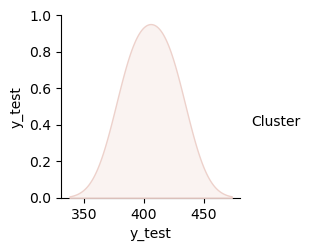

In [44]:
for i in range(0, len(high_corr_features), num_features_per_plot):
    subset_features = high_corr_features[i:i + num_features_per_plot]
    sns.pairplot(high_error_molecules, hue='Cluster', vars=subset_features)
    plt.savefig(f'/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/high_error_cluster_{i}_pairplot.png')
    plt.show()

## predizione molecola inventata


In [52]:
import glob
import os


path = '/home/federica/LAB2/chembl1865/egfr_qsar/qsar_results/class_5/predictions/'
files = sorted(glob.glob(os.path.join(path, '*.csv')))
modelli = ['SVR', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'MLP', 'XGBoost']
i=0
for file in files:
    for model in modelli:
        if 'retrain' in file and model in file:
            df = pd.read_csv(file)
            y_test = df['y_test']
            y_pred = df['y_pred']

            y_test = pic50_to_ic50(y_test)
            y_pred = pic50_to_ic50(y_pred)

            df_values = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
            df_values.to_csv(os.path.join(path, f'pred/y_values_{model}retrain.csv'))
        